In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage 
from skimage import io, color, filters, util, data, transform, feature

In [8]:
def harris_corner_detector(image, alpha=0.05, threshold=1e-3, window_size=3, sigma=1.0):
    
    
    # 1. Compute image derivatives
    Ix = ndimage.sobel(image, axis=1)  # compute horizontal derivative (x-direction)
    Iy = ndimage.sobel(image, axis=0)  # compute vertical derivative (y-direction)

    # 2. Compute products of derivatives
    Ixx = Ix * Ix  # Compute using hadamard product
    Iyy = Iy * Iy  # Compute using hadamard product
    Ixy = Ix * Iy  # Compute using hadamard product

    # 3. Gaussian filter to smooth the squared derivatives
    Sxx = ndimage.gaussian_filter(Ixx, sigma)  # Gaussian filter of Ixx
    Syy = ndimage.gaussian_filter(Iyy, sigma)  # Gaussian filter of Iyy
    Sxy = ndimage.gaussian_filter(Ixy, sigma)  # Gaussian filter of Ixy

    # 4. Compute cornerness 
    detM = Sxx * Syy - Sxy * Sxy  # Must be a function of only Sxx, Syy, or Sxy
    traceM = Sxx + Syy  # Must be a function of only Sxx, Syy, or Sxy
    C = detM - alpha * (traceM ** 2)  # C Must be a function of only detM, traceM, and alpha

    # 5. Threshold C to remove weak corners
    C_thresh = (C > threshold * C.max()) * C

    # 6. Non-maximum suppression
    win_half_size = int(window_size // 2)
    corners = []
    for y in range(win_half_size, C.shape[0]-win_half_size):
        for x in range(win_half_size, C.shape[1]-win_half_size):
            if C_thresh[y, x] == np.max(C_thresh[y-win_half_size : y+win_half_size+1,  x-win_half_size : x+win_half_size+1]):
                if C_thresh[y, x] > 0:
                    corners.append((y, x))

    return corners, C

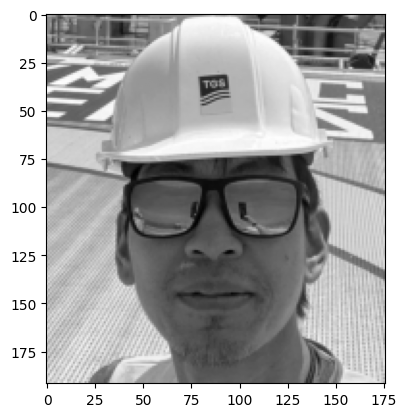

In [9]:
# load input image
img = util.img_as_float32( color.rgb2gray( io.imread('newpics/me.png') ) )
img = transform.rescale(img, 1/5)
plt.imshow(img, cmap='gray')

Text(0.5, 1.0, 'Harris Corner Detection')

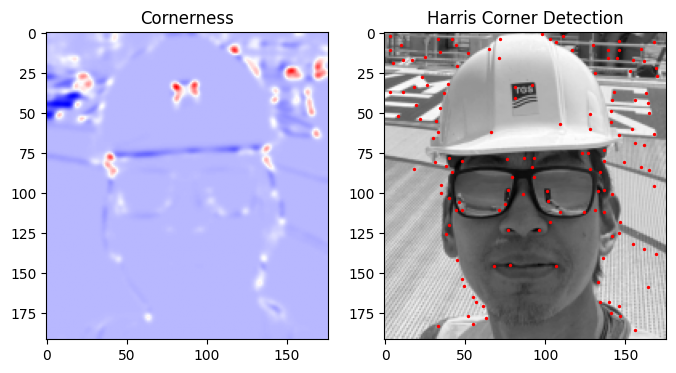

In [10]:
# Harris corner detection
threshold=1e-3
alpha=0.05
window_size=3
sigma=2.0
corners, C = harris_corner_detector(img, alpha, threshold, window_size, sigma)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
ax[0].imshow(C, cmap='bwr')
ax[0].set_title("Cornerness")
ax[1].imshow(img, cmap='gray')
y, x = zip(*corners)
ax[1].scatter(x, y, c='r', s=2)
ax[1].set_title("Harris Corner Detection")